# Image Analysis - Unit 02 - Real Datasets - Part 01

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%202%20-%20Unit%20Objective.png"> Unit Objectives

* Use a real dataset dataset and explore: label distribution, deliver an image montage, conduct average image, image variability and contrast between 2 average images studies



---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%204%20-%20Import%20Package%20for%20Learning.png"> Import Package for Learning

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("white")

# Lets extract the image files we will be using
from zipfile import ZipFile

with ZipFile('Chess.zip', 'r') as chessZip:
   chessZip.extractall()

---

## <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Image Analysis - Real Datasets - Part 01

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Real image datasets are different from the toy datasets we find in the ML libraries
* One major difference is the fact that real images will likely have different sizes, for example, you can't expect all images to be in the 100 x 50 pixels format.

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> One possible approach is that downloaded images will be arranged in a folder. Each folder will contain a set of sub-folders, related to the image labels. In each sub-folder, we find the image files
* Ultimately we want to have 3 folders: Train, Validation and Test. However, your dataset may come with: 
  * 1 folder (with subfolders as the labels)
  * 2 folders (like Train and Test)
  * or 3 folders (with Train, Validation and Test)

* Let's imagine our dataset is called Animals_Image, and there are 3 labels: Dog, Cat and Parrot. The data could be in one of three formats below:
  * Imagine there isn't only 2 distinct images in each folder. Instead there is a set of images, for each label, or in each folder





    

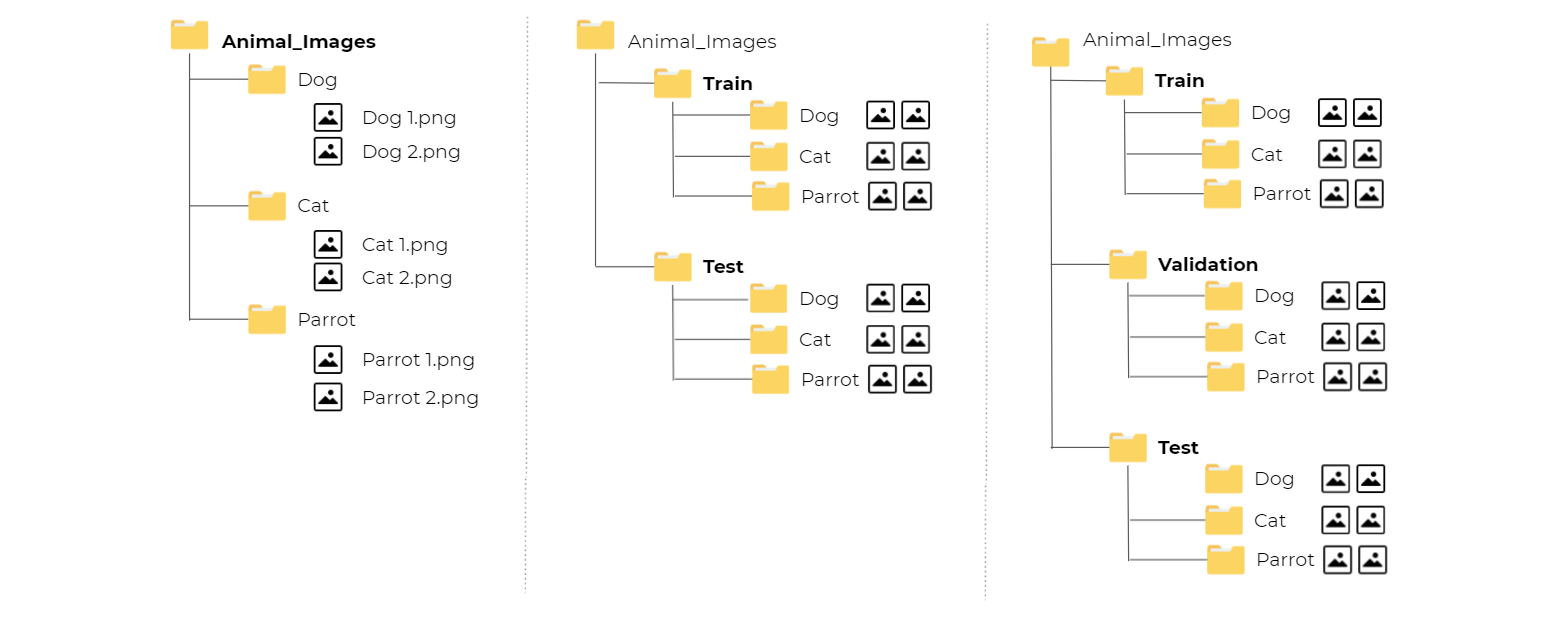

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> We want our data to be in a 3-folder structure. We will need to programatically move files between folders to do that. We will cover how to do that in the next unit.

* In this unit, we will use a dataset that comes with 1 folder only.


### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Image Analysis

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> We will use the following workflow to start our image analysis study in this unit:
* 1 - Set data directory
* 2 - Delete non image files
* 3 -  Assess Labels Distribution
* 4 - Build an Image Montage
* 5 - Calculate Average Image and Image Variability
* 6 - Contrast Between 2 Labels

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Set Data Directory

You will locate your data directory
* That is the root path of your data. In this case, the sub folder option is the dataset name folder: Chess

my_data_dir = 'Chess'
my_data_dir

The labels are assessed based on the folder names at Chess folder. This is done with the command `os.listdir()`, where the argument is the `'Chess'`. The documentation is found [here](https://docs.python.org/3/library/os.html#os.listdir)

import os
labels = os.listdir(my_data_dir)
labels

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Labels Distribution

We create custom code that:
* stores in a DataFrame: the name of the set (in this case, Chess), the label and its frequency
* We plot the DataFrame in a barplot showing the frequencies.

df_freq = pd.DataFrame([]) 
for folder in ['Chess']:   
                  # think 'Chess' as a Set Folder. 
                  # Ideally we want a Train Set, Val Set and Test Set
  for label in labels:
    df_freq = df_freq.append(
        pd.Series(data={'Set': folder,
                        'Label': label,
                        'Frequency':len(os.listdir(folder + '/' + label))}
                  ),
                  ignore_index=True
        )
    

df_freq

We plot the DataFrame using a barplot, where x is the `Set` (in this case is only Chess), y is the `Frequency` and hue is `Label`
* We notice the label's frequencies are not the same across all labels. There are sections where one is much less than another 


print("\n")
sns.set_style("whitegrid")
plt.figure(figsize=(8,5))
sns.barplot(data=df_freq, x='Set', y='Frequency', hue='Label')
plt.show()

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Image Montage

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Similarly to the previous unit, we want to do an Image Montage on the labels to start undestanding the dataset
* The difference now is that the dataset is located in folders, not in an array. One key logic difference in this function, is that it loops around the image names across different folders and "load and plot" the images in a Figure.
* Check the pseudo code to understand the logic
  * It is normal and okay if you don't get all code from the function below at first. The major point is to make sense the pseudo code and understand the function parameters.

import itertools
import random
from matplotlib.image import imread


def image_montage(dir_path, label_to_display, nrows, ncols, figsize=(15,10)):
  """
  logic
  - if label exists in the folder
  - check if your montage space is greater tha nsubset size
  - create list of axes indices based on nrows and ncols
  - create a Figure and display images
  - in this loop, load image and plot given image

  """
  sns.set_style("white")

  labels = os.listdir(dir_path)

  # subset the class you are interested to display
  if label_to_display in labels:

    # checks if your montage space is greater than subset size
    images_list = os.listdir(dir_path+'/'+ label_to_display)
    if nrows * ncols < len(images_list):
      img_idx = random.sample(images_list, nrows * ncols)
    else:
      print(
          f"Decrease nrows or ncols to create your montage. \n"
          f"There are {len(images_list)} in your subset. "
          f"You requested a montage with {nrows * ncols} spaces")
      return
    

    # create list of axes indices based on nrows and ncols
    list_rows= range(0,nrows)
    list_cols= range(0,ncols)
    plot_idx = list(itertools.product(list_rows,list_cols))


    # create a Figure and display images
    fig, axes = plt.subplots(nrows=nrows,ncols=ncols, figsize=figsize)
    for x in range(0,nrows*ncols):
      img = imread(dir_path + '/' + label_to_display + '/' + img_idx[x], 0)
      img_shape = img.shape
      axes[plot_idx[x][0], plot_idx[x][1]].imshow(img)
      axes[plot_idx[x][0], plot_idx[x][1]].set_title(f"Width {img_shape[1]}px x Height {img_shape[0]}px")
      axes[plot_idx[x][0], plot_idx[x][1]].set_xticks([])
      axes[plot_idx[x][0], plot_idx[x][1]].set_yticks([])
    plt.tight_layout()
    plt.show()


  else:
    print("The label you selected doesn't exist.")
    print(f"The existing options are: {labels}")

We create a logic where we loop over the labels, and for each we do a image montage
* Note also the images dimension are different

for label in labels:
  print(label)
  image_montage(dir_path= my_data_dir,
                label_to_display= label,
                nrows=2, ncols=3,
                figsize=(10,15)
                )
  print("\n")

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Average Image and Image Variability per Label

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> To compute an average image, all images have to be the same size. First we need to determine what will be the average image size, so we can load all images in an uniform array 
* We loop over the `train_path`, load each image and store the height and width in `dim1` and `dim2`. After, we plot the images size in a scatterplot and indicate the average image value for width and height

dim1, dim2 = [], []
for label in labels:
  for image_filename in os.listdir(my_data_dir + '/'+ label):
    img = imread(my_data_dir + '/' + label + '/'+ image_filename, 0)
    img_shape = img.shape
    dim1.append(img_shape[0]) # image height
    dim2.append(img_shape[1]) # image width

sns.set_style("whitegrid")
fig, axes = plt.subplots()
sns.scatterplot(x=dim2, y=dim1, alpha=0.2)
axes.set_xlabel("Width (pixels)")
axes.set_ylabel("Height (pixels)")
dim1_mean = int(np.array(dim1).mean())
dim2_mean = int(np.array(dim2).mean())
axes.axvline(x=dim2_mean,color='r', linestyle='--')
axes.axhline(y=dim1_mean,color='r', linestyle='--')
plt.show()
print(f"Width average: {dim2_mean} \nHeight average: {dim1_mean}")

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> We need to load all images into an uniform array
* We create a custom function that loops over a directory. In this directory, we find the possible labels as sub-folder. For each label (sub-folder), we load the image, resize to the average width and height we computed earlier and store in arrays. 
* At the end we have X and y arrays, where X stores the image pixels and y the label for each image.
  * It is normal and okay if you don't get all code from the function below at first. The major point is to make sense of the function parameters.

sns.set_style("white")
from tensorflow.keras.preprocessing import image

def load_image_as_array(my_data_dir, new_size=(50,50), images_amount = 20):
  
  X, y = np.array([], dtype='int'), np.array([], dtype='object')
  labels = os.listdir(my_data_dir)

  for label in labels:
    counter = 0
    for image_filename in os.listdir(my_data_dir + '/' + label):
      if counter < images_amount:
        
        img = image.load_img(my_data_dir + '/' + label + '/' + image_filename, target_size=new_size)
        if image.img_to_array(img).max() > 1: 
          img_resized = image.img_to_array(img) / 255
        else: 
          img_resized = image.img_to_array(img)
        
        X = np.append(X, img_resized).reshape(-1, new_size[0], new_size[1], img_resized.shape[2])
        y = np.append(y, label)
        counter += 1

  return X, y


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> The function parameters are:
* `my_data_dir`, we provide train_path (`/content/chess_dataset/Chessman-image-dataset/Chess`),
* `new_size`, which is the average image dimension from this dataset, and 
* `images_amount`, which is the number of images per label you want to load. You should consider that loading, resizing and storing image data will have a considerable computing cost. Here we can load the same amount of images per label and set a value that will not take much time to load. Also you may have memory issues when loading a lot of images, depeding on your memory availability


<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%206%20-%20Warning.png"> It make take 2 or 3 minutes to load all images

X, y = load_image_as_array(my_data_dir=my_data_dir,
                           new_size=(dim1_mean,dim2_mean),
                           images_amount = 2)

We will use `image_avg_and_variability_data_as_array()` to understand the average image and image variability for this dataset. This is the same function we used in the last unit

def image_avg_and_variability_data_as_array(X, y, figsize=(12,5)):
  """
   The pseudo code for the function is:
  * Loop in all labels
  * Subset an array for given label
  * Calculate average and standard deviation
  * Create a Figure displaying average and variability image

  """
  sns.set_style("white")

  for label_to_display in np.unique(y):

    y = y.reshape(-1,1,1)
    boolean_mask = np.any(y==label_to_display,axis=1).reshape(-1)
    arr = X[boolean_mask]

    avg_img = np.mean(arr, axis = 0)
    std_img = np.std(arr, axis = 0)
    print(f"==== Label {label_to_display} ====")
    print(f"Image Shape: {avg_img.shape}")
    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=figsize)
    axes[0].set_title(f"Average Image for label {label_to_display}")
    axes[0].imshow(avg_img, cmap='gray')
    axes[1].set_title(f"Image Variability for label {label_to_display}")
    axes[1].imshow(std_img, cmap='gray')
    plt.show()
    print("\n")
  

We parse X and y to understand average image and image variability per label
* You will likely notice typical patterns/shapes for pieces like king or knight; However the images (average and variabiliy) may be too blurred. 
* This happens since we didn't load many images, since we just wanted to show the use case. In case you want, get back to `load_image_as_array()`, set a higher value `images_amount`,  and rerun `image_avg_and_variability_data_as_array()`

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> To help the interpretation, consider the following guide:
* Check for the patterns where the color is darker or lighter
* For **Average Image**, we notice the general patterns for a given label
* For **Image Variability**, the lighter area indicates higher variability across images from the same label in that area. 

image_avg_and_variability_data_as_array(X=X, y=y, figsize=(12,5))

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> Note: There will be datasets where the images in a given label will have distinct shapes or patterns, and an average and variability study may not give the same amount of insights as we see in mnist dataset

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> For example, your dataset may contain images from fishes and birds from multiple species. 
* Eventually when you subset fishes and calculate an average image, the result will be a combination of patterns from multiple species of fishes, that may confuse a user that is not familiar with the context.

### <img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%2010-%20Lesson%20Content.png"> Contrast between 2 Labels

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> We may be in a moment of our project where we want to know the differences between 2 classes
* We will use the same function from last unit `contrast_between_2_labels_data_as_array()`

def subset_image_label(X,y,label_to_display):
  y = y.reshape(-1,1,1)
  boolean_mask = np.any(y==label_to_display,axis=1).reshape(-1)
  df = X[boolean_mask]
  return df

def contrast_between_2_labels_data_as_array(X, y, label_1, label_2, figsize=(12,5)):
  sns.set_style("white")

  if (label_1 not in np.unique(y)) or (label_2 not in np.unique(y)):
    print(f"Either label {label} or label {label_2}, are not in {np.unique(y)} ")
    return

  # calculate mean from label1
  images_label = subset_image_label(X, y, label_1)
  label1_avg = np.mean(images_label, axis = 0)

  # calculate mean from label2
  images_label = subset_image_label(X, y, label_2)
  label2_avg = np.mean(images_label, axis = 0)

  # calculate difference and plot difference, avg label1 and avg label2
  contrast_mean = label1_avg - label2_avg
  fig, axes = plt.subplots(nrows=1, ncols=3, figsize=figsize)
  axes[0].imshow(contrast_mean, cmap='gray')
  axes[0].set_title(f'Difference Between Averages: {label_1} & {label_2}')
  axes[1].imshow(label1_avg, cmap='gray')
  axes[1].set_title(f'Average {label_1}')
  axes[2].imshow(label2_avg, cmap='gray')
  axes[2].set_title(f'Average {label_2}')
  plt.show()

Let's compare King and Knight

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> To help the interpretation, consider the following guide:
* You are comparing label_1 to label_2
* In the Difference Between Averages plot, the darker area shows where both average images are similar. The lighter area shows where average images are different
* In this dataset, the contrast may not provide much insight, since there is a small amount of images per label.

contrast_between_2_labels_data_as_array(X=X, y=y,
                          label_1='King',
                          label_2='Knight',
                          figsize=(15,20)
                          )

<img width="3%" height="3%" align="top"  src="https://codeinstitute.s3.amazonaws.com/predictive_analytics/jupyter_notebook_icons/Icon%207-%20Note.png"> The same note from previous section applies here:
* There will be datasets where the images in a given label will have distinct shapes or patterns, and a contrast from averages study may not give the same amount of insights as we see in chess dataset